# Задание 1:
Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная:

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [5]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
x_1 = np.array([[2, 0], # пункт а
                [0, 3]])
x_2 = np.array([[2, 1], # пункт b
                [0, 3]])
x_3 = np.array([[2, 0], # пункт c
                [1, 3]])
x_4 = np.array([[2, 1], # пункт d
                [1, 1]])
x_5 = np.array([[1, 1, 0], # пункт e
                [0, 2,-5],
                [1, 0, 3]])

# Задание 2:
Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [8]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [10]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719 -0.70710678]
Собственное значение 4.0
соответствующий ему собственный вектор [ 0.4472136  -0.70710678]


Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [11]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [12]:
w1, v1 = np.linalg.eig(m)
for i in range(len(w1)):
    print("Собственное значение " + str(w1[i]))
    print("соответствующий ему собственный вектор " + str(v1[i]))

Собственное значение 5.999999999999998
соответствующий ему собственный вектор [-0.57735027 -0.81649658  0.15430335]
Собственное значение 2.9999999999999982
соответствующий ему собственный вектор [-0.57735027  0.40824829  0.6172134 ]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [ 0.57735027 -0.40824829  0.77151675]


# Задание 3:
Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [17]:
m2 = np.array([[1, 2],
              [2,3]])
print(m2)

[[1 2]
 [2 3]]


In [18]:
a, U = linalg.eig(m2)
print('Eigenvalues:')
print(a)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798+0.j  4.23606798+0.j]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [19]:
print(U * np.diag(a) * U.T)

[[-0.17082039+0.j -0.        +0.j]
 [-0.        +0.j  3.06524758-0.j]]


# Задание 4:
Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [20]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [21]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [22]:
X, y = load_digits(return_X_y=True)

In [23]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


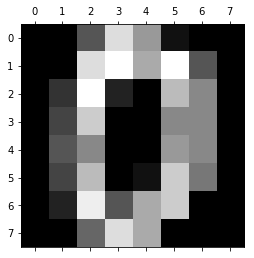

In [24]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()


In [25]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668961377439

In [26]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.80189204229271

In [27]:
svd = TruncatedSVD(n_components=10)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.732426500687206

In [28]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.8720089037284363

In [29]:
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.3136664849558428

In [30]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.6110183639398998